In [ ]:
###
#Title: Stock_Model_TreeAndLinearRegression
#Author: Guo Zebin

#Description: This is stock prediction model using ML models
#             Use tree regressor and linear regressor
#Evaluation: Using MSE
#Conclusion: Decision Tree Regressor performs better than linear regressor
#Discussion: 1. Why tree is better? 2. Only one feature used 3. (from 2) do not 
#             implement feature scaling technique, etc.

In [85]:
#Import all the library used
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [2]:
#load the data from Desktop
from google.colab import files
uploaded = files.upload()

Saving netflix.csv to netflix.csv


In [96]:
#store the data into df
df = pd.read_csv('netflix.csv')
df.tail(10)

,Date,High,Low,Open,Close,Volume,Adj Close
4871,2021-09-28,599.539978,580.159973,589.000000,583.849976,4431100.0,583.849976
4872,2021-09-29,609.880005,588.010010,589.010010,599.059998,6221000.0,599.059998
4873,2021-09-30,619.000000,608.049988,608.049988,610.340027,6612600.0,610.340027
4874,2021-10-01,614.989990,597.510010,604.239990,613.150024,4090800.0,613.150024
4875,2021-10-04,626.130005,594.679993,613.390015,603.349976,4995900.0,603.349976
4876,2021-10-05,640.390015,606.890015,606.940002,634.809998,9534300.0,634.809998
4877,2021-10-06,639.869995,626.359985,628.179993,639.099976,4580400.0,639.099976
4878,2021-10-07,646.840027,630.450012,642.229980,631.849976,3556900.0,631.849976
4879,2021-10-08,643.799988,630.859985,634.169983,632.659973,3271100.0,632.659973
4880,2021-10-11,639.419983,626.780029,633.200012,627.039978,2861200.0,627.039978


In [54]:
# get the size of data
df.shape

(4881, 7)

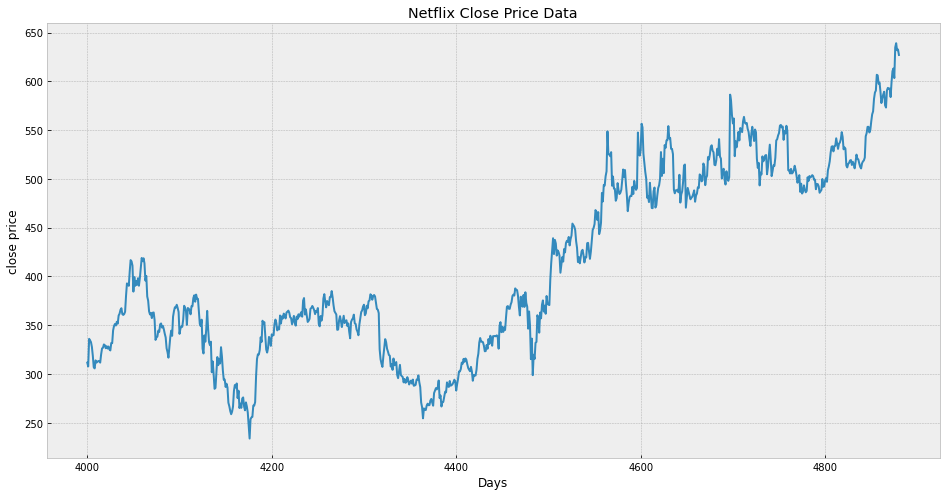

In [69]:
#visualise the close price data
plt.figure(figsize=(16,8))
plt.title('Netflix Close Price Data')
plt.xlabel('Days')
plt.ylabel('close price')
plt.plot(df['Close'][4000:])
plt.show()

In [57]:
# get the close price
df = df[['Close']]
df.shape

(4881, 1)

In [58]:
# Create a variable to pridict future days
future_days = 500
#create a new column shifted x prices up
df['predictions'] = df[['Close']].shift(-future_days)
df.tail(5)

,Close,predictions
4876,634.809998,NaN
4877,639.099976,NaN
4878,631.849976,NaN
4879,632.659973,NaN
4880,627.039978,NaN


In [59]:
#create the feature array X
X = np.array(df.drop(['predictions'], 1))[:-future_days]
print(X)
X.shape# only one feature

[[  1.19642901]
 [  1.21000004]
 [  1.157143  ]
 ...
 [285.52999878]
 [284.25      ]
 [286.27999878]]


(4381, 1)

In [60]:
#create the target array y 
y = np.array(df['predictions'])[:-future_days]
print(y)
y.shape

[  4.42857122   4.47857094   4.42000008 ... 631.84997559 632.65997314
 627.03997803]


(4381,)

In [92]:
#split the data into 0.8 training set and 0.2 test set
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2)

In [62]:
#create the models and feed the training data
tree = DecisionTreeRegressor().fit(X_train,y_train)
lr = LinearRegression().fit(X_train,y_train)

In [81]:
#get the last X rows with the future datasets
X_future = df.drop(['predictions'],1)[:-future_days]
X_future = X_future.tail(future_days)
X_future = np.array(X_future)
X_future[-5:]

array([[280.48001099],
       [282.92999268],
       [285.52999878],
       [284.25      ],
       [286.27999878]])

In [82]:
# show the model tree 
tree_prediction = tree.predict(X_future)
print('tree')
print(tree_prediction[-5:])
print('lr')
lr_prediction = lr.predict(X_future)
print(lr_prediction[-5:])

tree
[362.98999023 639.09997559 631.84997559 632.65997314 627.03997803]
lr
[441.99912944 445.68589299 449.59841519 447.67225677 450.72702471]


           Close  predictions
4781  501.670013   554.228040
4782  497.890015   545.394797
4783  502.899994   549.397604
4784  501.339996   536.501348
4785  502.359985   526.494353
...          ...          ...
4876  634.809998   441.999129
4877  639.099976   445.685893
4878  631.849976   449.598415
4879  632.659973   447.672257
4880  627.039978   450.727025

[100 rows x 2 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


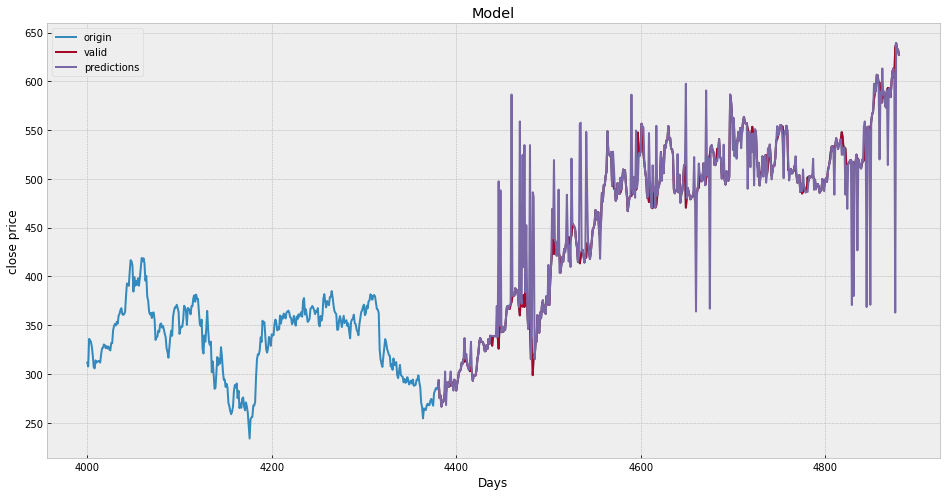

In [94]:
#visualise the data
predictions = tree_prediction
valid = df[X.shape[0]:]
print(valid.tail(100))
valid['predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('close price')
plt.plot(df['Close'][4000:])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['origin', 'valid', 'predictions'])
plt.show()

In [95]:
#Compute the performance using MSE for tree regressor
real = valid['Close']
pred = valid['predictions']
print('MSE:')
print(mean_squared_error(real, pred)/500)

MSE:
2.795975603260599


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


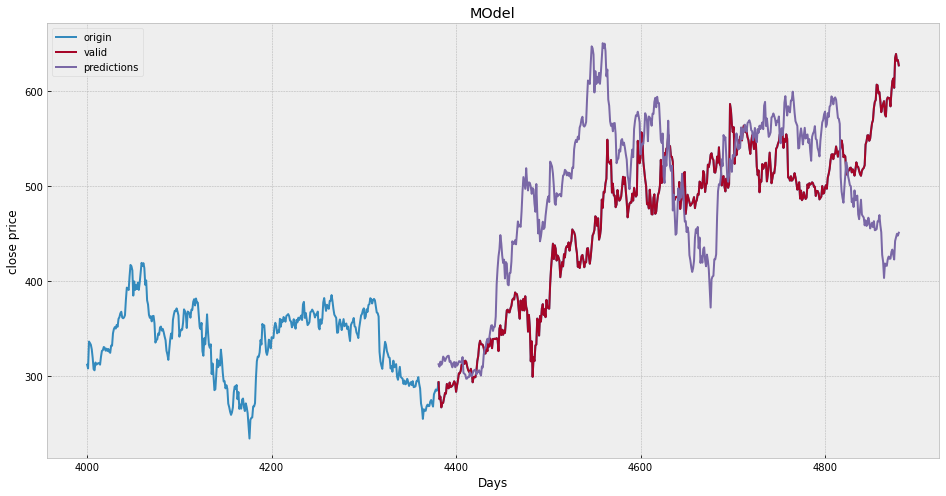

MSE:
13.4848452443663


In [91]:
#visualise the data
predictions = lr_prediction
valid = df[X.shape[0]:]
valid['predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('MOdel')
plt.xlabel('Days')
plt.ylabel('close price')
plt.plot(df['Close'][4000:])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['origin', 'valid', 'predictions'])
plt.show()

In [ ]:
#Compute the performance using MSE for linear regressor
real = valid['Close']
pred = valid['predictions']
print('MSE:')
print(mean_squared_error(real, pred)/500)